In [2]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
df = pd.read_csv("v3_data.csv",index_col=0)

In [4]:

print("Data types: ")
df.info()


Data types: 
<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 12/5/2025 9:02:08 to 12/10/2025 13:28:03
Data columns (total 28 columns):
 #   Column                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                               --------------  -----  
 0   What is your age?                                                                                                                                                                    212 non-null    int64  
 1   What is your current grade level?                                                                                                                                                    212 non-null    object 
 2   What is yo

In [5]:
# Renaming all columns to better names

rename_map = {
    "What is your age?": "age",
    "What is your current grade level?": "grade",
    "What is your gender?": "gender",
    "About how many writing assignments (paragraphs, essays, or written projects) do you complete for school in a typical week?":
        "assignments_per_week",
    "At your school, using AI tools for writing assignments is:":
        "overall_policy",
    "Compared to other students in my grade, I think my writing skills are:":
        "writing_ability",
    "I use AI tools (such as ChatGPT, Grammarly, or Gemini) to brainstorm ideas for my school writing.":
        "ai_brainstorm",
    "I use AI tools to help me draft or write full sentences and paragraphs for my assignments.\n":
        "ai_draft",
    "I use AI tools to edit or proofread my writing (for example, to fix grammar or wording).\n":
        "ai_edit",
    "I use AI tools when I am stuck and do not know how to continue my writing.\n":
        "ai_stuck",
    "Overall, I rely on AI tools when completing my writing assignments.\n":
        "ai_rely",
    "My writing feels creative and original when I work on school assignments.\n":
        "creat_feels_creative",
    "Using AI tools helps me come up with new ideas for my writing.\n":
        "creat_ai_helps_ideas",
    "When I use AI tools, my writing feels more creative than when I do not use them.\n":
        "creat_more_creative_with_ai",
    "I feel confident in my own ability to generate creative ideas for writing, even without AI.\n":
        "creat_conf_no_ai",
    "I enjoy experimenting with different ways to express my ideas in writing.\n":
        "creat_enjoy_writing",
    "The work I submit for writing assignments feels like it is primarily my own.\n":
        "auth_work_own",
    "When I use AI tools, I still feel that the ideas in my writing belong to me.\n":
        "auth_ideas_mine",
    "When I use AI tools, I sometimes feel less connected to the writing as “my” work.\n":
        "auth_less_connected",
    "I worry that using AI tools might make my writing feel less genuine or authentic.\n":
        "auth_less_authentic",
    "I feel comfortable taking credit for assignments where I used AI tools.\n":
        "auth_comfort_credit",
    "Optional:\nPaste a short paragraph (4–8 sentences) from a recent school assignment where you used AI tools at some point in your writing. Do not put your name in this response.":
        "para_optional",
    "Optional:\nPaste a short paragraph (4–8 sentences) from a school assignment that you wrote without using any AI tools. Do not put your name in this response.":
        "para_no_optional",
    "Optional:\nBriefly describe how you used AI (if at all) in the AI-assisted paragraph above (for example: brainstorming, drafting, revising, editing, etc.).":
        "how_description_used",
    "I worry that I’m using AI on my assignments more than I should, and that I could get caught":
        "auth_worry_copy",
    "How much have you been educated on AI use?":
        "artificial_intelligence_instruction",
}

df = df.rename(columns=rename_map)

In [6]:
# 0 never -- 5 always

df.describe()



,age,ai_brainstorm,ai_draft,ai_edit,ai_stuck,ai_rely,creat_feels_creative,creat_ai_helps_ideas,creat_more_creative_with_ai,creat_conf_no_ai,creat_enjoy_writing,auth_work_own,auth_ideas_mine,auth_less_connected,auth_less_authentic,auth_comfort_credit,auth_worry_copy,Column 25,Creativity Questions [Row 1]
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,211.000000,0.0,0.0
mean,16.094340,2.745283,2.056604,2.858491,2.410377,1.990566,3.811321,2.589623,2.146226,4.066038,3.349057,4.344340,3.084906,3.056604,3.283019,2.636792,1.834123,NaN,NaN
std,0.860159,1.262371,1.183057,1.427148,1.279250,1.168263,0.950063,1.222415,1.185351,1.018957,1.204592,0.875856,1.408289,1.312212,1.354331,1.308074,0.973932,NaN,NaN
min,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,4.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,NaN,NaN
50%,16.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,2.000000,NaN,NaN
75%,17.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,NaN,NaN
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN


In [7]:
df.head()

,age,grade,gender,assignments_per_week,overall_policy,writing_ability,ai_brainstorm,ai_draft,ai_edit,ai_stuck,...,auth_less_connected,auth_less_authentic,auth_comfort_credit,Optional:\nPaste a short paragraph (4–8 sentences) from a recent school assignment where you used AI tools at some point in the writing process.\n,Optional:\nPaste a short paragraph (4–8 sentences) from a school assignment that you wrote without using any AI tools. Do not include any names of other people.,"Optional:\nBriefly describe how you used AI (if at all) in the AI-assisted paragraph above (for example: brainstorming, drafting, editing). Do not include any names of other people",auth_worry_copy,artificial_intelligence_instruction,Column 25,Creativity Questions [Row 1]
Timestamp,,,,,,,,,,,,,,,,,,,,,
12/5/2025 9:02:08,17,12th Grade,Female,2-3,NaN,NaN,2,1,5,3,...,3,5,4,Political culture is a set of values or belief...,The proposed law would affect fiscal policy th...,"I only really used it for grammer,",NaN,NaN,NaN,NaN
12/8/2025 11:26:04,16,11th Grade,Male,2-3,Sometimes allowed depending on the assignment,Much better,2,2,1,1,...,5,5,3,NaN,NaN,NaN,1.0,A lot,NaN,NaN
12/8/2025 11:26:36,16,11th Grade,Female,4-5,Mostly not tolerated,About the same,4,3,2,4,...,2,3,3,NaN,NaN,NaN,2.0,Some,NaN,NaN
12/8/2025 11:27:27,16,11th Grade,Female,2-3,Sometimes allowed depending on the assignment,A little better,4,1,3,3,...,4,4,5,I have used AI tools during writing assignment...,NaN,NaN,2.0,Some,NaN,NaN
12/8/2025 11:27:34,16,11th Grade,Female,2-3,Sometimes allowed depending on the assignment,A little better,1,1,1,1,...,4,4,1,NaN,The last essay we wrote in AP Lang I didn't us...,NaN,1.0,Some,NaN,NaN


In [8]:
# Creating the analysis dataframe, sorting the items into 3 main categories
adf = df.copy()

# All scores for each of the 3 categories
ai_items = []
authorship_items = []
creativity_items = []


for item in df.columns:
    if "auth" in item:
        authorship_items.append(item)
    if "creat" in item:
        creativity_items.append(item)

ai_items = [
    "ai_brainstorm",
    "ai_draft",
    "ai_edit",
    "ai_stuck",
    "ai_rely",
]

authorship_items=authorship_items[:-1]

print(ai_items)
print(authorship_items)
print(creativity_items)



['ai_brainstorm', 'ai_draft', 'ai_edit', 'ai_stuck', 'ai_rely']
['auth_work_own', 'auth_ideas_mine', 'auth_less_connected', 'auth_less_authentic', 'auth_comfort_credit']
['creat_feels_creative', 'creat_ai_helps_ideas', 'creat_more_creative_with_ai', 'creat_conf_no_ai', 'creat_enjoy_writing']


In [9]:
# computing the scores across the 3 sections, for authorship some parts are reverse coded
adf[ai_items]
adf["AI_USE_SCORE"] = adf[ai_items].mean(axis=1)
adf["CREATIVITY_SCORE"] = adf[creativity_items].mean(axis=1)

neg_auth_items = ["auth_less_connected", "auth_less_authentic", "auth_worry_copy"]

for col in neg_auth_items:
    adf[col + "_REV"] = 6 - adf[col]  # 1–5 scale -> reverse

authorship_items = [
    "auth_work_own",
    "auth_ideas_mine",
    "auth_comfort_credit",
    "auth_less_connected_REV",
    "auth_less_authentic_REV",
]

adf["AUTHORSHIP_SCORE"] = adf[authorship_items].mean(axis=1)


In [10]:
import tensorflow as tf
import keras


def cronbach_alpha(df_subset):
    items = df_subset.to_numpy(dtype=float)
    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)
    k = items.shape[1]
    return (k / (k-1)) * (1 - item_vars.sum() / total_var)

alpha_ai = cronbach_alpha(adf[ai_items])
alpha_creat = cronbach_alpha(adf[creativity_items])
alpha_auth = cronbach_alpha(adf[authorship_items])

creativity_general_items = [
    "creat_feels_creative",
    "creat_conf_no_ai",
    "creat_enjoy_writing",
]

creativity_ai_boost_items = [
    "creat_ai_helps_ideas",
    "creat_more_creative_with_ai",
]

adf["CREATIVITY_GENERAL"] = adf[creativity_general_items].mean(axis=1)
adf["CREATIVITY_AI_BOOST"] = adf[creativity_ai_boost_items].mean(axis=1)

alpha_creat_general = cronbach_alpha(adf[creativity_general_items])

alpha_ai, alpha_creat, alpha_auth, alpha_creat_general


/Users/pranilraichura/DEPsych-AI-On-Students-Study/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


(np.float64(0.8897660281581226),
 np.float64(0.21142593117456726),
 np.float64(0.6320710634989772),
 np.float64(0.693508150248051))

In [11]:
def alpha_without(col_to_drop):
    cols = [c for c in authorship_items if c != col_to_drop]
    return col_to_drop, cronbach_alpha(adf[cols])


for col in authorship_items:
    print("WITHOUT",alpha_without(col))


WITHOUT ('auth_work_own', np.float64(0.7475314788097995))
WITHOUT ('auth_ideas_mine', np.float64(0.5305698803851941))
WITHOUT ('auth_comfort_credit', np.float64(0.532432791148454))
WITHOUT ('auth_less_connected_REV', np.float64(0.4752101749350202))
WITHOUT ('auth_less_authentic_REV', np.float64(0.49779026386937925))


In [12]:
pairs = [
    ("AI_USE_SCORE", "CREATIVITY_GENERAL"),
    ("AI_USE_SCORE", "AUTHORSHIP_SCORE"),
    ("CREATIVITY_GENERAL", "AUTHORSHIP_SCORE"),
]

for x, y in pairs:
    r, p = pearsonr(adf[x], adf[y])
    print(f"{x} vs {y}: r = {r:.3f}, p = {p:.4f}")

NameError: name 'pearsonr' is not defined

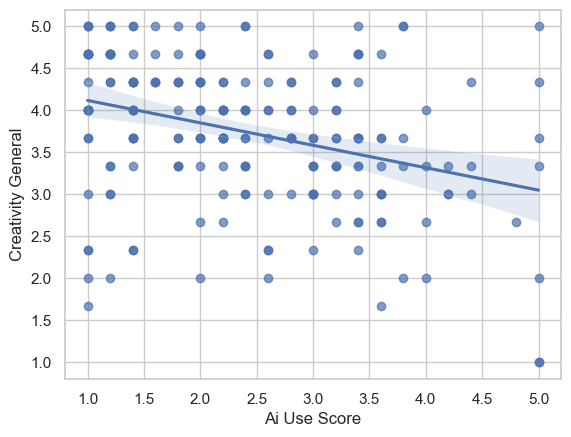

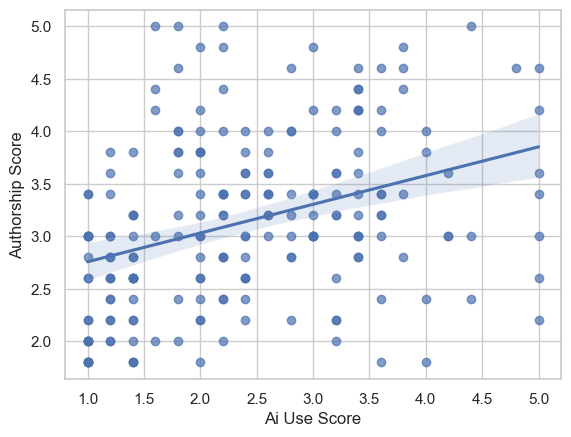

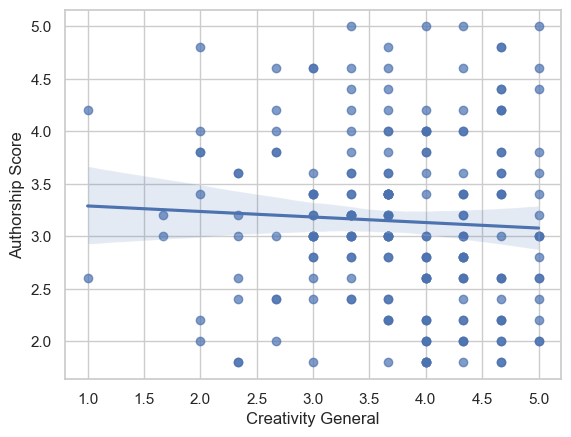

In [ ]:
plot_pair("AI_USE_SCORE","CREATIVITY_GENERAL")
plot_pair("AI_USE_SCORE","AUTHORSHIP_SCORE")
plot_pair("CREATIVITY_GENERAL","AUTHORSHIP_SCORE")

array([[<Axes: title={'center': 'AI_USE_SCORE'}>,
        <Axes: title={'center': 'CREATIVITY_GENERAL'}>],
       [<Axes: title={'center': 'AUTHORSHIP_SCORE'}>, <Axes: >]],
      dtype=object)

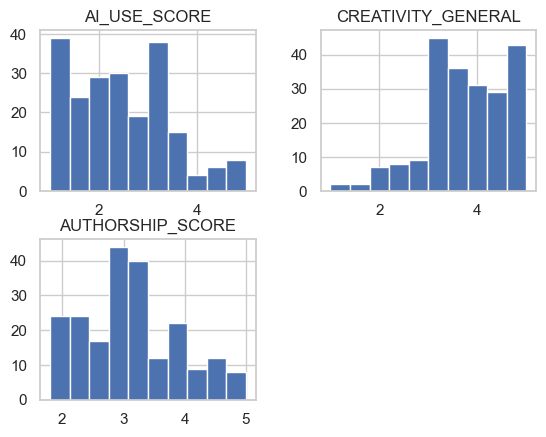

In [ ]:
# making all the NEW correlatonal plots

adf[["AI_USE_SCORE","CREATIVITY_GENERAL","AUTHORSHIP_SCORE"]].describe()
adf[["AI_USE_SCORE","CREATIVITY_GENERAL","AUTHORSHIP_SCORE"]].hist()


In [ ]:
# Cronbach's Alpha Scores per section

alpha_ai          = cronbach_alpha(adf[ai_items])
alpha_creat_gen   = cronbach_alpha(adf[creativity_general_items])
alpha_auth_core   = cronbach_alpha(adf[authorship_core_items])

alpha_ai, alpha_creat_gen, alpha_auth_core

(np.float64(0.8897660281581226),
 np.float64(0.693508150248051),
 np.float64(0.7475314788097995))

# ============================================================================
# CLEANED-UP ANALYSIS SECTION
# ============================================================================
# This section contains corrected code and new analyses per instructions

In [ ]:
# ============================================================================
# CORRECTED COMPOSITE SCORES (per instructions)
# ============================================================================
# CRITICAL: These construct definitions must NOT be changed

# Ensure we have the correct item lists
ai_items = [
    "ai_brainstorm",
    "ai_draft",
    "ai_edit",
    "ai_stuck",
    "ai_rely",
]

creativity_general_items = [
    "creat_feels_creative",
    "creat_conf_no_ai",
    "creat_enjoy_writing",
]

creativity_ai_boost_items = [
    "creat_ai_helps_ideas",
    "creat_more_creative_with_ai",
]

# Recalculate composite scores with correct definitions
adf["AI_USE_SCORE"] = adf[ai_items].mean(axis=1)
adf["CREATIVITY_GENERAL"] = adf[creativity_general_items].mean(axis=1)
adf["CREATIVITY_AI_BOOST"] = adf[creativity_ai_boost_items].mean(axis=1)

# Reverse code authorship items (excluding auth_worry_copy per instructions)
neg_auth_items = ["auth_less_connected", "auth_less_authentic"]
for col in neg_auth_items:
    adf[col + "_REV"] = 6 - adf[col]

# Authorship core items (4 items, excluding auth_work_own and auth_worry_copy)
authorship_core_items = [
    "auth_ideas_mine",
    "auth_comfort_credit",
    "auth_less_connected_REV",
    "auth_less_authentic_REV",
]

adf["AUTHORSHIP_SCORE"] = adf[authorship_core_items].mean(axis=1)

# Sanity check
print("=== SANITY CHECK: Composite Score Ranges ===")
print(f"AI_USE_SCORE: [{adf['AI_USE_SCORE'].min():.3f}, {adf['AI_USE_SCORE'].max():.3f}]")
print(f"CREATIVITY_GENERAL: [{adf['CREATIVITY_GENERAL'].min():.3f}, {adf['CREATIVITY_GENERAL'].max():.3f}]")
print(f"AUTHORSHIP_SCORE: [{adf['AUTHORSHIP_SCORE'].min():.3f}, {adf['AUTHORSHIP_SCORE'].max():.3f}]")
print(f"\nSample size: {len(adf)} participants")

=== SANITY CHECK: Composite Score Ranges ===
AI_USE_SCORE: [1.000, 5.000]
CREATIVITY_GENERAL: [1.000, 5.000]
AUTHORSHIP_SCORE: [1.000, 5.000]

Sample size: 212 participants


In [23]:
# ============================================================================
# CORRECTED RELIABILITY (Cronbach's Alpha)
# ============================================================================

def cronbach_alpha(df_subset):
    """Calculate Cronbach's alpha for internal consistency reliability."""
    items = df_subset.to_numpy(dtype=float)
    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)
    k = items.shape[1]
    return (k / (k-1)) * (1 - item_vars.sum() / total_var)

# Calculate reliability for each scale
alpha_ai = cronbach_alpha(adf[ai_items])
alpha_creat_gen = cronbach_alpha(adf[creativity_general_items])
alpha_auth_core = cronbach_alpha(adf[authorship_core_items])

print("=== RELIABILITY (Cronbach's Alpha) ===")
print(f"AI Use Scale: α = {alpha_ai:.3f}")
print(f"Creativity General Scale: α = {alpha_creat_gen:.3f}")
print(f"Authorship Core Scale: α = {alpha_auth_core:.3f}")
print()
print("Expected values (from instructions):")
print("  AI Use: ~0.89 (excellent)")
print("  Creativity General: ~0.69 (acceptable)")
print("  Authorship Core: ~0.75 (acceptable)")

=== RELIABILITY (Cronbach's Alpha) ===
AI Use Scale: α = 0.890
Creativity General Scale: α = 0.694
Authorship Core Scale: α = 0.748

Expected values (from instructions):
  AI Use: ~0.89 (excellent)
  Creativity General: ~0.69 (acceptable)
  Authorship Core: ~0.75 (acceptable)


In [24]:
# ============================================================================
# CORRELATION ANALYSIS (must be reproducible)
# ============================================================================

from scipy.stats import pearsonr

pairs = [
    ("AI_USE_SCORE", "CREATIVITY_GENERAL"),
    ("AI_USE_SCORE", "AUTHORSHIP_SCORE"),
    ("CREATIVITY_GENERAL", "AUTHORSHIP_SCORE"),
]

print("=== CORRELATIONS ===")
for x, y in pairs:
    r, p = pearsonr(adf[x], adf[y])
    n = len(adf[[x, y]].dropna())
    print(f"{x} vs {y}: r = {r:.3f}, p = {p:.4f}, n = {n}")

print()
print("Expected ranges (from instructions):")
print("  AI_USE_SCORE vs CREATIVITY_GENERAL: r ≈ -0.33 to -0.42, p < 0.001")
print("  AI_USE_SCORE vs AUTHORSHIP_SCORE: r ≈ +0.40 to +0.45, p < 0.001")
print("  CREATIVITY_GENERAL vs AUTHORSHIP_SCORE: r ≈ -0.17 to -0.20, p ≈ 0.01-0.03")

=== CORRELATIONS ===
AI_USE_SCORE vs CREATIVITY_GENERAL: r = -0.337, p = 0.0000, n = 212
AI_USE_SCORE vs AUTHORSHIP_SCORE: r = 0.444, p = 0.0000, n = 212
CREATIVITY_GENERAL vs AUTHORSHIP_SCORE: r = -0.170, p = 0.0134, n = 212

Expected ranges (from instructions):
  AI_USE_SCORE vs CREATIVITY_GENERAL: r ≈ -0.33 to -0.42, p < 0.001
  AI_USE_SCORE vs AUTHORSHIP_SCORE: r ≈ +0.40 to +0.45, p < 0.001
  CREATIVITY_GENERAL vs AUTHORSHIP_SCORE: r ≈ -0.17 to -0.20, p ≈ 0.01-0.03


# ============================================================================
# REGRESSION ANALYSES WITH CONTROLS
# ============================================================================

In [26]:
# ============================================================================
# PREPARE COVARIATES FOR REGRESSION
# ============================================================================

# Numeric grade
adf["grade_num"] = adf["grade"].str.extract(r"(\d+)").astype(float)

# Gender dummy (Female = 1, other = 0)
adf["gender_female"] = (adf["gender"] == "Female").astype(int)

# Overall policy numeric
policy_map = {
    "Completely not tolerated": 1,
    "Mostly not tolerated": 2,
    "Sometimes allowed depending on the assignment": 3,
    "Mostly allowed": 4,
    "Completely allowed": 5,
}
adf["overall_policy_num"] = adf["overall_policy"].map(policy_map)

# Convert assignments_per_week to numeric if it's categorical
if adf["assignments_per_week"].dtype == 'object':
    # Map common categories to numeric
    assignments_map = {
        "0-1": 1,
        "1": 1,
        "2-3": 2.5,
        "4-5": 4.5,
        "6+": 6,
    }
    # Try to map, if not found, try to extract number
    adf["assignments_per_week_num"] = adf["assignments_per_week"].map(assignments_map)
    # Fill any NaN with extracted number
    adf["assignments_per_week_num"] = adf["assignments_per_week_num"].fillna(
        adf["assignments_per_week"].str.extract(r"(\d+)")[0].astype(float)
    )
else:
    adf["assignments_per_week_num"] = adf["assignments_per_week"]

# Convert artificial_intelligence_instruction to numeric
if adf["artificial_intelligence_instruction"].dtype == 'object':
    ai_edu_map = {
        "None at all": 1,
        "A little": 2,
        "Some": 3,
        "Quite a bit": 4,
        "A lot": 5,
    }
    adf["artificial_intelligence_instruction_num"] = adf["artificial_intelligence_instruction"].map(ai_edu_map)
else:
    adf["artificial_intelligence_instruction_num"] = adf["artificial_intelligence_instruction"]

# Convert writing_ability to numeric (for clustering and regression)
if adf["writing_ability"].dtype == 'object':
    writing_ability_map = {
        "Much worse": 1,
        "A little worse": 2,
        "About the same": 3,
        "A little better": 4,
        "Much better": 5,
    }
    adf["writing_ability_num"] = adf["writing_ability"].map(writing_ability_map)
else:
    adf["writing_ability_num"] = adf["writing_ability"]

print("Covariates prepared:")
print(f"  grade_num: {adf['grade_num'].notna().sum()} valid")
print(f"  gender_female: {adf['gender_female'].sum()} females")
print(f"  overall_policy_num: {adf['overall_policy_num'].notna().sum()} valid")
print(f"  assignments_per_week_num: {adf['assignments_per_week_num'].notna().sum()} valid")
print(f"  artificial_intelligence_instruction_num: {adf['artificial_intelligence_instruction_num'].notna().sum()} valid")
print(f"  writing_ability_num: {adf['writing_ability_num'].notna().sum()} valid")

Covariates prepared:
  grade_num: 212 valid
  gender_female: 106 females
  overall_policy_num: 211 valid
  assignments_per_week_num: 212 valid
  artificial_intelligence_instruction_num: 211 valid
  writing_ability_num: 211 valid


In [28]:
# ============================================================================
# MODEL A: Predict CREATIVITY_GENERAL
# ============================================================================

import statsmodels.formula.api as smf

model_creat = smf.ols(
    "CREATIVITY_GENERAL ~ AI_USE_SCORE + grade_num + gender_female + "
    "writing_ability_num + assignments_per_week_num + overall_policy_num + "
    "artificial_intelligence_instruction_num",
    data=adf
).fit()

print("=" * 70)
print("MODEL A: Predicting CREATIVITY_GENERAL")
print("=" * 70)
print(model_creat.summary())
print()
print(f"Sample size: {model_creat.nobs}")
print(f"R-squared: {model_creat.rsquared:.3f}")
print()
print("Key coefficient:")
print(f"  AI_USE_SCORE: β = {model_creat.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_creat.pvalues['AI_USE_SCORE']:.4f}")
print()
print("Expected: AI_USE_SCORE should have NEGATIVE coefficient and be significant")

MODEL A: Predicting CREATIVITY_GENERAL
                            OLS Regression Results                            
Dep. Variable:     CREATIVITY_GENERAL   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     9.673
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.25e-10
Time:                        09:37:28   Log-Likelihood:                -230.93
No. Observations:                 211   AIC:                             477.9
Df Residuals:                     203   BIC:                             504.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [29]:
# ============================================================================
# MODEL B: Predict AUTHORSHIP_SCORE
# ============================================================================

model_auth = smf.ols(
    "AUTHORSHIP_SCORE ~ AI_USE_SCORE + grade_num + gender_female + "
    "writing_ability_num + assignments_per_week_num + overall_policy_num + "
    "artificial_intelligence_instruction_num",
    data=adf
).fit()

print("=" * 70)
print("MODEL B: Predicting AUTHORSHIP_SCORE")
print("=" * 70)
print(model_auth.summary())
print()
print(f"Sample size: {model_auth.nobs}")
print(f"R-squared: {model_auth.rsquared:.3f}")
print()
print("Key coefficient:")
print(f"  AI_USE_SCORE: β = {model_auth.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_auth.pvalues['AI_USE_SCORE']:.4f}")
print()
print("Expected: AI_USE_SCORE should have POSITIVE coefficient and be significant")

MODEL B: Predicting AUTHORSHIP_SCORE
                            OLS Regression Results                            
Dep. Variable:       AUTHORSHIP_SCORE   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     9.082
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           9.58e-10
Time:                        09:37:57   Log-Likelihood:                -273.91
No. Observations:                 211   AIC:                             563.8
Df Residuals:                     203   BIC:                             590.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [30]:
# ============================================================================
# CHECK MULTICOLLINEARITY
# ============================================================================

predictors = [
    "AI_USE_SCORE", "grade_num", "gender_female", "writing_ability_num",
    "assignments_per_week_num", "overall_policy_num", "artificial_intelligence_instruction_num"
]

# Correlation matrix of predictors
pred_data = adf[predictors].dropna()
corr_matrix = pred_data.corr()

print("=== PREDICTOR CORRELATION MATRIX ===")
print(corr_matrix.round(3))
print()
print("Note: Correlations > 0.7 may indicate multicollinearity concerns")

=== PREDICTOR CORRELATION MATRIX ===
                                         AI_USE_SCORE  grade_num  \
AI_USE_SCORE                                    1.000     -0.013   
grade_num                                      -0.013      1.000   
gender_female                                  -0.047      0.059   
writing_ability_num                            -0.165      0.159   
assignments_per_week_num                        0.032      0.180   
overall_policy_num                              0.251     -0.027   
artificial_intelligence_instruction_num         0.081     -0.004   

                                         gender_female  writing_ability_num  \
AI_USE_SCORE                                    -0.047               -0.165   
grade_num                                        0.059                0.159   
gender_female                                    1.000                0.036   
writing_ability_num                              0.036                1.000   
assignments_per_week_nu

# ============================================================================
# MODERATION ANALYSIS
# ============================================================================
# Test whether the link between AI use and authorship depends on writing ability

In [35]:
# ============================================================================
# MODEL C: Moderation - AI_USE_SCORE × writing_ability interaction
# ============================================================================

import statsmodels.formula.api as smf

model_auth_int = smf.ols(
    "AUTHORSHIP_SCORE ~ AI_USE_SCORE * writing_ability_num + grade_num + gender_female "
    "+ assignments_per_week_num + overall_policy_num + artificial_intelligence_instruction_num",
    data=adf
).fit()

print("=" * 70)
print("MODEL C: AUTHORSHIP_SCORE with AI_USE_SCORE × writing_ability interaction")
print("=" * 70)
print(model_auth_int.summary())
print()
print(f"Sample size: {model_auth_int.nobs}")
print(f"R-squared: {model_auth_int.rsquared:.3f}")
print()

# Check interaction term
if 'AI_USE_SCORE:writing_ability_num' in model_auth_int.params.index:
    interaction_coef = model_auth_int.params['AI_USE_SCORE:writing_ability_num']
    interaction_p = model_auth_int.pvalues['AI_USE_SCORE:writing_ability_num']
    print("Interaction term:")
    print(f"  AI_USE_SCORE:writing_ability_num: β = {interaction_coef:.3f}, p = {interaction_p:.4f}")
    
    if interaction_p < 0.05:
        print("\n*** SIGNIFICANT INTERACTION DETECTED ***")
        print("The effect of AI_USE_SCORE on AUTHORSHIP_SCORE depends on writing_ability")
        
        # Calculate simple slopes at low and high writing ability
        writing_mean = adf['writing_ability_num'].mean()
        writing_sd = adf['writing_ability_num'].std()
        writing_low = writing_mean - writing_sd
        writing_high = writing_mean + writing_sd
        
        ai_coef = model_auth_int.params['AI_USE_SCORE']
        int_coef = model_auth_int.params['AI_USE_SCORE:writing_ability_num']
        
        slope_low = ai_coef + int_coef * writing_low
        slope_high = ai_coef + int_coef * writing_high
        
        print(f"\nSimple slopes:")
        print(f"  Low writing ability (M - 1SD = {writing_low:.2f}): β = {slope_low:.3f}")
        print(f"  High writing ability (M + 1SD = {writing_high:.2f}): β = {slope_high:.3f}")
    else:
        print("\nNo significant interaction - effect of AI_USE_SCORE does not depend on writing_ability")
else:
    print("Interaction term not found in model")

MODEL C: AUTHORSHIP_SCORE with AI_USE_SCORE × writing_ability interaction
                            OLS Regression Results                            
Dep. Variable:       AUTHORSHIP_SCORE   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     7.923
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.92e-09
Time:                        09:45:23   Log-Likelihood:                -273.86
No. Observations:                 211   AIC:                             565.7
Df Residuals:                     202   BIC:                             595.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# ============================================================================
# CLUSTERING ANALYSIS (Light ML)
# ============================================================================
# Identify student profiles based on AI use, creativity, authorship, and covariates

In [ ]:
# ============================================================================
# K-MEANS CLUSTERING
# ============================================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare features for clustering
# Note: Use writing_ability_num (numeric) instead of writing_ability (categorical)
cluster_features = adf[[
    "AI_USE_SCORE",
    "CREATIVITY_GENERAL",
    "AUTHORSHIP_SCORE",
    "writing_ability_num",
    "artificial_intelligence_instruction_num"
]].dropna()

print(f"Clustering on {len(cluster_features)} participants with complete data")
print()

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(cluster_features)

# K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_features = cluster_features.copy()
cluster_features["cluster"] = kmeans.fit_predict(X)

# Compute cluster means
cluster_means = cluster_features.groupby("cluster").mean()[[
    "AI_USE_SCORE", "CREATIVITY_GENERAL", "AUTHORSHIP_SCORE", 
    "writing_ability_num", "artificial_intelligence_instruction_num"
]]

print("=== CLUSTER PROFILES ===")
print(cluster_means.round(3))
print()
print("Cluster sizes:")
print(cluster_features["cluster"].value_counts().sort_index())

Clustering on 211 participants with complete data

=== CLUSTER PROFILES ===
         AI_USE_SCORE  CREATIVITY_GENERAL  AUTHORSHIP_SCORE  \
cluster                                                       
0               2.691               4.014             3.596   
1               3.193               2.847             3.186   
2               1.610               4.142             1.957   

         writing_ability_num  artificial_intelligence_instruction_num  
cluster                                                                
0                      3.971                                    2.857  
1                      2.729                                    3.373  
2                      3.817                                    3.280  

Cluster sizes:
cluster
0    70
1    59
2    82
Name: count, dtype: int64


/Users/pranilraichura/DEPsych-AI-On-Students-Study/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/pranilraichura/DEPsych-AI-On-Students-Study/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/pranilraichura/DEPsych-AI-On-Students-Study/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


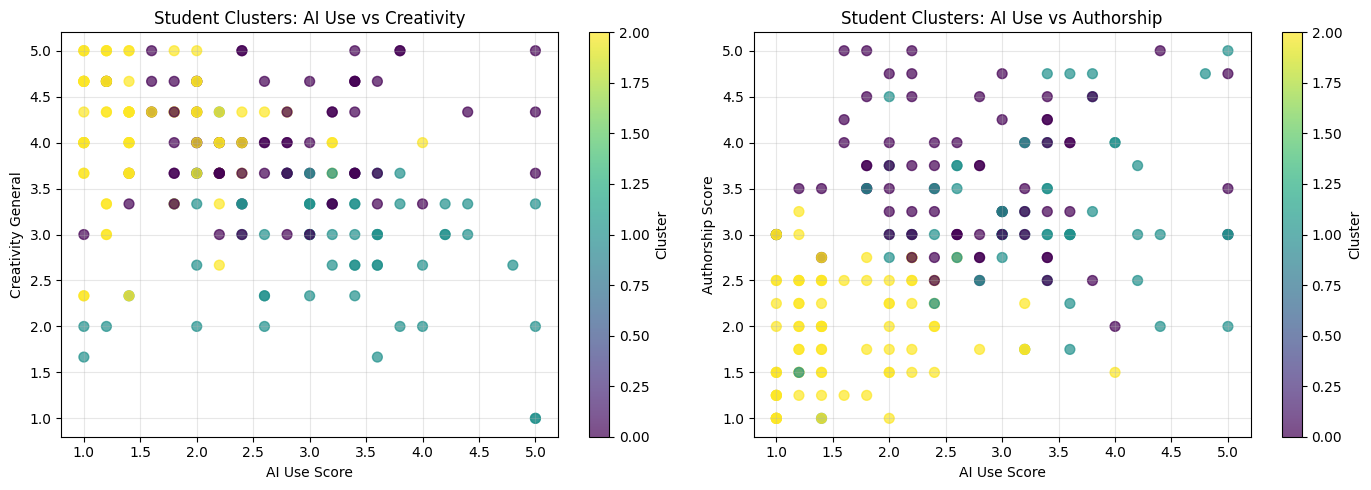

Cluster plot saved as 'cluster_analysis.png'


In [ ]:
# ============================================================================
# CLUSTER VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: AI Use vs Creativity
scatter1 = axes[0].scatter(
    cluster_features["AI_USE_SCORE"],
    cluster_features["CREATIVITY_GENERAL"],
    c=cluster_features["cluster"],
    cmap='viridis',
    alpha=0.7,
    s=50
)
axes[0].set_xlabel("AI Use Score")
axes[0].set_ylabel("Creativity General")
axes[0].set_title("Student Clusters: AI Use vs Creativity")
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: AI Use vs Authorship
scatter2 = axes[1].scatter(
    cluster_features["AI_USE_SCORE"],
    cluster_features["AUTHORSHIP_SCORE"],
    c=cluster_features["cluster"],
    cmap='viridis',
    alpha=0.7,
    s=50
)
axes[1].set_xlabel("AI Use Score")
axes[1].set_ylabel("Authorship Score")
axes[1].set_title("Student Clusters: AI Use vs Authorship")
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.savefig('cluster_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Cluster plot saved as 'cluster_analysis.png'")

In [ ]:
# ============================================================================
# INTERPRET CLUSTERS
# ============================================================================

print("=== CLUSTER INTERPRETATION ===")
print()

for cluster_id in sorted(cluster_features["cluster"].unique()):
    cluster_data = cluster_means.loc[cluster_id]
    n = (cluster_features["cluster"] == cluster_id).sum()
    
    print(f"Cluster {cluster_id} (n = {n}):")
    print(f"  AI Use: {cluster_data['AI_USE_SCORE']:.2f}")
    print(f"  Creativity: {cluster_data['CREATIVITY_GENERAL']:.2f}")
    print(f"  Authorship: {cluster_data['AUTHORSHIP_SCORE']:.2f}")
    print(f"  Writing Ability: {cluster_data['writing_ability_num']:.2f}")
    print(f"  AI Education: {cluster_data['artificial_intelligence_instruction_num']:.2f}")
    
    # Simple interpretation
    ai_level = "High" if cluster_data['AI_USE_SCORE'] > cluster_means['AI_USE_SCORE'].mean() else "Low"
    creat_level = "High" if cluster_data['CREATIVITY_GENERAL'] > cluster_means['CREATIVITY_GENERAL'].mean() else "Low"
    auth_level = "High" if cluster_data['AUTHORSHIP_SCORE'] > cluster_means['AUTHORSHIP_SCORE'].mean() else "Low"
    
    print(f"  Profile: {ai_level} AI / {creat_level} Creativity / {auth_level} Authorship")
    print()

=== CLUSTER INTERPRETATION ===

Cluster 0 (n = 70):
  AI Use: 2.69
  Creativity: 4.01
  Authorship: 3.60
  Writing Ability: 3.97
  AI Education: 2.86
  Profile: High AI / High Creativity / High Authorship

Cluster 1 (n = 59):
  AI Use: 3.19
  Creativity: 2.85
  Authorship: 3.19
  Writing Ability: 2.73
  AI Education: 3.37
  Profile: High AI / Low Creativity / High Authorship

Cluster 2 (n = 82):
  AI Use: 1.61
  Creativity: 4.14
  Authorship: 1.96
  Writing Ability: 3.82
  AI Education: 3.28
  Profile: Low AI / High Creativity / Low Authorship



# ============================================================================
# SUMMARY OF KEY RESULTS FOR PAPER
# ============================================================================

In [ ]:
# ============================================================================
# COMPILE KEY RESULTS FOR PAPER
# ============================================================================

print("=" * 70)
print("KEY RESULTS FOR PAPER")
print("=" * 70)
print()

print("1. RELIABILITY (Cronbach's Alpha):")
print(f"   AI Use Scale: α = {alpha_ai:.3f}")
print(f"   Creativity General Scale: α = {alpha_creat_gen:.3f}")
print(f"   Authorship Core Scale: α = {alpha_auth_core:.3f}")
print()

print("2. CORRELATIONS:")
for x, y in pairs:
    r, p = pearsonr(adf[x], adf[y])
    sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else ""
    print(f"   {x} vs {y}: r = {r:.3f}, p = {p:.4f} {sig}")
print()

print("3. REGRESSION RESULTS:")
print(f"   Model A (Creativity):")
print(f"     AI_USE_SCORE: β = {model_creat.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_creat.pvalues['AI_USE_SCORE']:.4f}, "
      f"R² = {model_creat.rsquared:.3f}, n = {model_creat.nobs}")
print(f"   Model B (Authorship):")
print(f"     AI_USE_SCORE: β = {model_auth.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_auth.pvalues['AI_USE_SCORE']:.4f}, "
      f"R² = {model_auth.rsquared:.3f}, n = {model_auth.nobs}")
print()

if 'AI_USE_SCORE:writing_ability' in model_auth_int.params.index:
    int_p = model_auth_int.pvalues['AI_USE_SCORE:writing_ability']
    if int_p < 0.05:
        print("4. MODERATION:")
        print(f"   Significant interaction: AI_USE_SCORE × writing_ability")
        print(f"     β = {model_auth_int.params['AI_USE_SCORE:writing_ability']:.3f}, "
              f"p = {int_p:.4f}")
print()

print("5. DESCRIPTIVE STATISTICS:")
print(f"   AI_USE_SCORE: M = {adf['AI_USE_SCORE'].mean():.2f}, SD = {adf['AI_USE_SCORE'].std():.2f}")
print(f"   CREATIVITY_GENERAL: M = {adf['CREATIVITY_GENERAL'].mean():.2f}, SD = {adf['CREATIVITY_GENERAL'].std():.2f}")
print(f"   AUTHORSHIP_SCORE: M = {adf['AUTHORSHIP_SCORE'].mean():.2f}, SD = {adf['AUTHORSHIP_SCORE'].std():.2f}")
print()

print("=" * 70)

KEY RESULTS FOR PAPER

1. RELIABILITY (Cronbach's Alpha):
   AI Use Scale: α = 0.890
   Creativity General Scale: α = 0.694
   Authorship Core Scale: α = 0.748

2. CORRELATIONS:
   AI_USE_SCORE vs CREATIVITY_GENERAL: r = -0.337, p = 0.0000 ***
   AI_USE_SCORE vs AUTHORSHIP_SCORE: r = 0.444, p = 0.0000 ***
   CREATIVITY_GENERAL vs AUTHORSHIP_SCORE: r = -0.170, p = 0.0134 *

3. REGRESSION RESULTS:
   Model A (Creativity):
     AI_USE_SCORE: β = -0.221, p = 0.0000, R² = 0.250, n = 211.0
   Model B (Authorship):
     AI_USE_SCORE: β = 0.418, p = 0.0000, R² = 0.238, n = 211.0


5. DESCRIPTIVE STATISTICS:
   AI_USE_SCORE: M = 2.41, SD = 1.06
   CREATIVITY_GENERAL: M = 3.74, SD = 0.84
   AUTHORSHIP_SCORE: M = 2.85, SD = 1.02



# ============================================================================
# ANALYSIS WITH V4_DATA.CSV (NEW DATASET)
# ============================================================================
# Complete analysis repeated with v4_data.csv (246 participants)

In [ ]:
# ============================================================================
# LOAD AND PREPARE V4 DATA
# ============================================================================

# Load v4_data.csv
df_v4 = pd.read_csv("v4_data.csv", index_col=0)

print(f"V4 Data loaded: {len(df_v4)} participants, {len(df_v4.columns)} columns")
print(f"Date range: {df_v4.index.min()} to {df_v4.index.max()}")

# Rename columns (same mapping as v3)
rename_map = {
    "What is your age?": "age",
    "What is your current grade level?": "grade",
    "What is your gender?": "gender",
    "About how many writing assignments (paragraphs, essays, or written projects) do you complete for school in a typical week?":
        "assignments_per_week",
    "At your school, using AI tools for writing assignments is:":
        "overall_policy",
    "Compared to other students in my grade, I think my writing skills are:":
        "writing_ability",
    "I use AI tools (such as ChatGPT, Grammarly, or Gemini) to brainstorm ideas for my school writing.":
        "ai_brainstorm",
    "I use AI tools to help me draft or write full sentences and paragraphs for my assignments.\n":
        "ai_draft",
    "I use AI tools to edit or proofread my writing (for example, to fix grammar or wording).\n":
        "ai_edit",
    "I use AI tools when I am stuck and do not know how to continue my writing.\n":
        "ai_stuck",
    "Overall, I rely on AI tools when completing my writing assignments.\n":
        "ai_rely",
    "My writing feels creative and original when I work on school assignments.\n":
        "creat_feels_creative",
    "Using AI tools helps me come up with new ideas for my writing.\n":
        "creat_ai_helps_ideas",
    "When I use AI tools, my writing feels more creative than when I do not use them.\n":
        "creat_more_creative_with_ai",
    "I feel confident in my own ability to generate creative ideas for writing, even without AI.\n":
        "creat_conf_no_ai",
    "I enjoy experimenting with different ways to express my ideas in writing.\n":
        "creat_enjoy_writing",
    "The work I submit for writing assignments feels like it is primarily my own.\n":
        "auth_work_own",
    "When I use AI tools, I still feel that the ideas in my writing belong to me.\n":
        "auth_ideas_mine",
    "When I use AI tools, I sometimes feel less connected to the writing as \"my\" work.\n":
        "auth_less_connected",
    "I worry that using AI tools might make my writing feel less genuine or authentic.\n":
        "auth_less_authentic",
    "I feel comfortable taking credit for assignments where I used AI tools.\n":
        "auth_comfort_credit",
    "I worry that I'm using AI on my assignments more than I should, and that I could get caught":
        "auth_worry_copy",
    "How much have you been educated on AI use?":
        "artificial_intelligence_instruction",
}

# Handle columns that might have slight variations
for col in df_v4.columns:
    if "less connected" in col.lower() and "auth_less_connected" not in df_v4.columns:
        rename_map[col] = "auth_less_connected"
    if ("less genuine" in col.lower() or ("authentic" in col.lower() and "worry" not in col.lower())) and "auth_less_authentic" not in df_v4.columns:
        rename_map[col] = "auth_less_authentic"

df_v4 = df_v4.rename(columns=rename_map)

# Create analysis dataframe
adf_v4 = df_v4.copy()

print(f"\nAfter renaming: {len(adf_v4)} participants")
print(f"Key columns available: ai_brainstorm={('ai_brainstorm' in adf_v4.columns)}, creat_feels_creative={('creat_feels_creative' in adf_v4.columns)}, auth_ideas_mine={('auth_ideas_mine' in adf_v4.columns)}")

In [ ]:
# ============================================================================
# V4: COMPOSITE SCORE CALCULATIONS
# ============================================================================
# CRITICAL: These construct definitions must NOT be changed

# Ensure we have the correct item lists
ai_items = [
    "ai_brainstorm",
    "ai_draft",
    "ai_edit",
    "ai_stuck",
    "ai_rely",
]

creativity_general_items = [
    "creat_feels_creative",
    "creat_conf_no_ai",
    "creat_enjoy_writing",
]

creativity_ai_boost_items = [
    "creat_ai_helps_ideas",
    "creat_more_creative_with_ai",
]

# Calculate composite scores
adf_v4["AI_USE_SCORE"] = adf_v4[ai_items].mean(axis=1)
adf_v4["CREATIVITY_GENERAL"] = adf_v4[creativity_general_items].mean(axis=1)
adf_v4["CREATIVITY_AI_BOOST"] = adf_v4[creativity_ai_boost_items].mean(axis=1)

# Reverse code authorship items (excluding auth_worry_copy per instructions)
neg_auth_items = ["auth_less_connected", "auth_less_authentic"]
for col in neg_auth_items:
    if col in adf_v4.columns:
        adf_v4[col + "_REV"] = 6 - adf_v4[col]  # 1–5 scale -> reverse

# Authorship core items (4 items, excluding auth_work_own and auth_worry_copy)
authorship_core_items = [
    "auth_ideas_mine",
    "auth_comfort_credit",
    "auth_less_connected_REV",
    "auth_less_authentic_REV",
]

adf_v4["AUTHORSHIP_SCORE"] = adf_v4[authorship_core_items].mean(axis=1)

# Sanity check
print("=== V4 DATA: SANITY CHECK: Composite Score Ranges ===")
print(f"AI_USE_SCORE: [{adf_v4['AI_USE_SCORE'].min():.3f}, {adf_v4['AI_USE_SCORE'].max():.3f}]")
print(f"CREATIVITY_GENERAL: [{adf_v4['CREATIVITY_GENERAL'].min():.3f}, {adf_v4['CREATIVITY_GENERAL'].max():.3f}]")
print(f"AUTHORSHIP_SCORE: [{adf_v4['AUTHORSHIP_SCORE'].min():.3f}, {adf_v4['AUTHORSHIP_SCORE'].max():.3f}]")
print(f"\nSample size: {len(adf_v4)} participants")

In [ ]:
# ============================================================================
# V4: RELIABILITY (Cronbach's Alpha)
# ============================================================================

def cronbach_alpha(df_subset):
    """Calculate Cronbach's alpha for internal consistency reliability."""
    items = df_subset.to_numpy(dtype=float)
    item_vars = items.var(axis=0, ddof=1)
    total_scores = items.sum(axis=1)
    total_var = total_scores.var(ddof=1)
    k = items.shape[1]
    return (k / (k-1)) * (1 - item_vars.sum() / total_var)

# Calculate reliability for each scale
alpha_ai_v4 = cronbach_alpha(adf_v4[ai_items])
alpha_creat_gen_v4 = cronbach_alpha(adf_v4[creativity_general_items])
alpha_auth_core_v4 = cronbach_alpha(adf_v4[authorship_core_items])

print("=== V4 DATA: RELIABILITY (Cronbach's Alpha) ===")
print(f"AI Use Scale: α = {alpha_ai_v4:.3f}")
print(f"Creativity General Scale: α = {alpha_creat_gen_v4:.3f}")
print(f"Authorship Core Scale: α = {alpha_auth_core_v4:.3f}")
print()
print("Comparison with v3_data:")
print(f"  AI Use: v3={0.890:.3f}, v4={alpha_ai_v4:.3f}")
print(f"  Creativity General: v3={0.694:.3f}, v4={alpha_creat_gen_v4:.3f}")
print(f"  Authorship Core: v3={0.748:.3f}, v4={alpha_auth_core_v4:.3f}")

In [ ]:
# ============================================================================
# V4: CORRELATION ANALYSIS
# ============================================================================

from scipy.stats import pearsonr

pairs = [
    ("AI_USE_SCORE", "CREATIVITY_GENERAL"),
    ("AI_USE_SCORE", "AUTHORSHIP_SCORE"),
    ("CREATIVITY_GENERAL", "AUTHORSHIP_SCORE"),
]

print("=== V4 DATA: CORRELATIONS ===")
for x, y in pairs:
    r, p = pearsonr(adf_v4[x], adf_v4[y])
    n = len(adf_v4[[x, y]].dropna())
    print(f"{x} vs {y}: r = {r:.3f}, p = {p:.4f}, n = {n}")

print()
print("Comparison with v3_data:")
print("  AI_USE vs CREATIVITY: v3 r=-0.337, v4 r=" + f"{pearsonr(adf_v4['AI_USE_SCORE'], adf_v4['CREATIVITY_GENERAL'])[0]:.3f}")
print("  AI_USE vs AUTHORSHIP: v3 r=+0.444, v4 r=" + f"{pearsonr(adf_v4['AI_USE_SCORE'], adf_v4['AUTHORSHIP_SCORE'])[0]:.3f}")
print("  CREATIVITY vs AUTHORSHIP: v3 r=-0.170, v4 r=" + f"{pearsonr(adf_v4['CREATIVITY_GENERAL'], adf_v4['AUTHORSHIP_SCORE'])[0]:.3f}")

# ============================================================================
# V4: REGRESSION ANALYSES WITH CONTROLS
# ============================================================================

In [ ]:
# ============================================================================
# V4: PREPARE COVARIATES FOR REGRESSION
# ============================================================================

# Numeric grade
adf_v4["grade_num"] = adf_v4["grade"].str.extract(r"(\d+)").astype(float)

# Gender dummy (Female = 1, other = 0)
adf_v4["gender_female"] = (adf_v4["gender"] == "Female").astype(int)

# Overall policy numeric
policy_map = {
    "Completely not tolerated": 1,
    "Mostly not tolerated": 2,
    "Sometimes allowed depending on the assignment": 3,
    "Mostly allowed": 4,
    "Completely allowed": 5,
}
adf_v4["overall_policy_num"] = adf_v4["overall_policy"].map(policy_map)

# Convert assignments_per_week to numeric if it's categorical
if adf_v4["assignments_per_week"].dtype == 'object':
    assignments_map = {
        "0-1": 1,
        "1": 1,
        "2-3": 2.5,
        "4-5": 4.5,
        "6+": 6,
    }
    adf_v4["assignments_per_week_num"] = adf_v4["assignments_per_week"].map(assignments_map)
    adf_v4["assignments_per_week_num"] = adf_v4["assignments_per_week_num"].fillna(
        adf_v4["assignments_per_week"].str.extract(r"(\d+)")[0].astype(float)
    )
else:
    adf_v4["assignments_per_week_num"] = adf_v4["assignments_per_week"]

# Convert artificial_intelligence_instruction to numeric
if adf_v4["artificial_intelligence_instruction"].dtype == 'object':
    ai_edu_map = {
        "None at all": 1,
        "A little": 2,
        "Some": 3,
        "Quite a bit": 4,
        "A lot": 5,
    }
    adf_v4["artificial_intelligence_instruction_num"] = adf_v4["artificial_intelligence_instruction"].map(ai_edu_map)
else:
    adf_v4["artificial_intelligence_instruction_num"] = adf_v4["artificial_intelligence_instruction"]

# Convert writing_ability to numeric
if adf_v4["writing_ability"].dtype == 'object':
    writing_ability_map = {
        "Much worse": 1,
        "A little worse": 2,
        "About the same": 3,
        "A little better": 4,
        "Much better": 5,
    }
    adf_v4["writing_ability_num"] = adf_v4["writing_ability"].map(writing_ability_map)
else:
    adf_v4["writing_ability_num"] = adf_v4["writing_ability"]

print("V4 Data - Covariates prepared:")
print(f"  grade_num: {adf_v4['grade_num'].notna().sum()} valid")
print(f"  gender_female: {adf_v4['gender_female'].sum()} females")
print(f"  overall_policy_num: {adf_v4['overall_policy_num'].notna().sum()} valid")
print(f"  assignments_per_week_num: {adf_v4['assignments_per_week_num'].notna().sum()} valid")
print(f"  artificial_intelligence_instruction_num: {adf_v4['artificial_intelligence_instruction_num'].notna().sum()} valid")
print(f"  writing_ability_num: {adf_v4['writing_ability_num'].notna().sum()} valid")

In [ ]:
# ============================================================================
# V4: MODEL A - Predict CREATIVITY_GENERAL
# ============================================================================

import statsmodels.formula.api as smf

model_creat_v4 = smf.ols(
    "CREATIVITY_GENERAL ~ AI_USE_SCORE + grade_num + gender_female + "
    "writing_ability_num + assignments_per_week_num + overall_policy_num + "
    "artificial_intelligence_instruction_num",
    data=adf_v4
).fit()

print("=" * 70)
print("V4 DATA: MODEL A: Predicting CREATIVITY_GENERAL")
print("=" * 70)
print(model_creat_v4.summary())
print()
print(f"Sample size: {model_creat_v4.nobs}")
print(f"R-squared: {model_creat_v4.rsquared:.3f}")
print()
print("Key coefficient:")
print(f"  AI_USE_SCORE: β = {model_creat_v4.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_creat_v4.pvalues['AI_USE_SCORE']:.4f}")
print()
print("Comparison with v3_data:")
print(f"  v3: β = -0.221, p < 0.001, R² = 0.250, n = 211")
print(f"  v4: β = {model_creat_v4.params['AI_USE_SCORE']:.3f}, p = {model_creat_v4.pvalues['AI_USE_SCORE']:.4f}, R² = {model_creat_v4.rsquared:.3f}, n = {model_creat_v4.nobs}")

In [ ]:
# ============================================================================
# V4: MODEL B - Predict AUTHORSHIP_SCORE
# ============================================================================

model_auth_v4 = smf.ols(
    "AUTHORSHIP_SCORE ~ AI_USE_SCORE + grade_num + gender_female + "
    "writing_ability_num + assignments_per_week_num + overall_policy_num + "
    "artificial_intelligence_instruction_num",
    data=adf_v4
).fit()

print("=" * 70)
print("V4 DATA: MODEL B: Predicting AUTHORSHIP_SCORE")
print("=" * 70)
print(model_auth_v4.summary())
print()
print(f"Sample size: {model_auth_v4.nobs}")
print(f"R-squared: {model_auth_v4.rsquared:.3f}")
print()
print("Key coefficient:")
print(f"  AI_USE_SCORE: β = {model_auth_v4.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_auth_v4.pvalues['AI_USE_SCORE']:.4f}")
print()
print("Comparison with v3_data:")
print(f"  v3: β = +0.418, p < 0.001, R² = 0.238, n = 211")
print(f"  v4: β = {model_auth_v4.params['AI_USE_SCORE']:.3f}, p = {model_auth_v4.pvalues['AI_USE_SCORE']:.4f}, R² = {model_auth_v4.rsquared:.3f}, n = {model_auth_v4.nobs}")

In [ ]:
# ============================================================================
# V4: CHECK MULTICOLLINEARITY
# ============================================================================

predictors = [
    "AI_USE_SCORE", "grade_num", "gender_female", "writing_ability_num",
    "assignments_per_week_num", "overall_policy_num", "artificial_intelligence_instruction_num"
]

pred_data_v4 = adf_v4[predictors].dropna()
corr_matrix_v4 = pred_data_v4.corr()

print("=== V4 DATA: PREDICTOR CORRELATION MATRIX ===")
print(corr_matrix_v4.round(3))
print()
print("Note: Correlations > 0.7 may indicate multicollinearity concerns")

# ============================================================================
# V4: MODERATION ANALYSIS
# ============================================================================
# Test whether the link between AI use and authorship depends on writing ability

In [ ]:
# ============================================================================
# V4: MODEL C - Moderation - AI_USE_SCORE × writing_ability interaction
# ============================================================================

import statsmodels.formula.api as smf

model_auth_int_v4 = smf.ols(
    "AUTHORSHIP_SCORE ~ AI_USE_SCORE * writing_ability_num + grade_num + gender_female "
    "+ assignments_per_week_num + overall_policy_num + artificial_intelligence_instruction_num",
    data=adf_v4
).fit()

print("=" * 70)
print("V4 DATA: MODEL C: AUTHORSHIP_SCORE with AI_USE_SCORE × writing_ability interaction")
print("=" * 70)
print(model_auth_int_v4.summary())
print()
print(f"Sample size: {model_auth_int_v4.nobs}")
print(f"R-squared: {model_auth_int_v4.rsquared:.3f}")
print()

# Check interaction term
if 'AI_USE_SCORE:writing_ability_num' in model_auth_int_v4.params.index:
    interaction_coef = model_auth_int_v4.params['AI_USE_SCORE:writing_ability_num']
    interaction_p = model_auth_int_v4.pvalues['AI_USE_SCORE:writing_ability_num']
    print("Interaction term:")
    print(f"  AI_USE_SCORE:writing_ability_num: β = {interaction_coef:.3f}, p = {interaction_p:.4f}")
    
    if interaction_p < 0.05:
        print("\n*** SIGNIFICANT INTERACTION DETECTED ***")
        print("The effect of AI_USE_SCORE on AUTHORSHIP_SCORE depends on writing_ability")
        
        # Calculate simple slopes at low and high writing ability
        writing_mean = adf_v4['writing_ability_num'].mean()
        writing_sd = adf_v4['writing_ability_num'].std()
        writing_low = writing_mean - writing_sd
        writing_high = writing_mean + writing_sd
        
        ai_coef = model_auth_int_v4.params['AI_USE_SCORE']
        int_coef = model_auth_int_v4.params['AI_USE_SCORE:writing_ability_num']
        
        slope_low = ai_coef + int_coef * writing_low
        slope_high = ai_coef + int_coef * writing_high
        
        print(f"\nSimple slopes:")
        print(f"  Low writing ability (M - 1SD = {writing_low:.2f}): β = {slope_low:.3f}")
        print(f"  High writing ability (M + 1SD = {writing_high:.2f}): β = {slope_high:.3f}")
    else:
        print("\nNo significant interaction - effect of AI_USE_SCORE does not depend on writing_ability")
    
    print()
    print("Comparison with v3_data:")
    print(f"  v3: Interaction β = -0.019, p = 0.757 (not significant)")
    print(f"  v4: Interaction β = {interaction_coef:.3f}, p = {interaction_p:.4f}")
else:
    print("Interaction term not found in model")

# ============================================================================
# V4: CLUSTERING ANALYSIS (Light ML)
# ============================================================================
# Identify student profiles based on AI use, creativity, authorship, and covariates

In [ ]:
# ============================================================================
# V4: K-MEANS CLUSTERING
# ============================================================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare features for clustering
cluster_features_v4 = adf_v4[[
    "AI_USE_SCORE",
    "CREATIVITY_GENERAL",
    "AUTHORSHIP_SCORE",
    "writing_ability_num",
    "artificial_intelligence_instruction_num"
]].dropna()

print(f"V4 Data - Clustering on {len(cluster_features_v4)} participants with complete data")
print()

# Standardize features
scaler_v4 = StandardScaler()
X_v4 = scaler_v4.fit_transform(cluster_features_v4)

# K-means with 3 clusters
kmeans_v4 = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_features_v4 = cluster_features_v4.copy()
cluster_features_v4["cluster"] = kmeans_v4.fit_predict(X_v4)

# Compute cluster means
cluster_means_v4 = cluster_features_v4.groupby("cluster").mean()[[
    "AI_USE_SCORE", "CREATIVITY_GENERAL", "AUTHORSHIP_SCORE",
    "writing_ability_num", "artificial_intelligence_instruction_num"
]]

print("=== V4 DATA: CLUSTER PROFILES ===")
print(cluster_means_v4.round(3))
print()
print("Cluster sizes:")
print(cluster_features_v4["cluster"].value_counts().sort_index())

In [ ]:
# ============================================================================
# V4: CLUSTER VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: AI Use vs Creativity
scatter1 = axes[0].scatter(
    cluster_features_v4["AI_USE_SCORE"],
    cluster_features_v4["CREATIVITY_GENERAL"],
    c=cluster_features_v4["cluster"],
    cmap='viridis',
    alpha=0.7,
    s=50
)
axes[0].set_xlabel("AI Use Score")
axes[0].set_ylabel("Creativity General")
axes[0].set_title("V4 Data: Student Clusters - AI Use vs Creativity")
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: AI Use vs Authorship
scatter2 = axes[1].scatter(
    cluster_features_v4["AI_USE_SCORE"],
    cluster_features_v4["AUTHORSHIP_SCORE"],
    c=cluster_features_v4["cluster"],
    cmap='viridis',
    alpha=0.7,
    s=50
)
axes[1].set_xlabel("AI Use Score")
axes[1].set_ylabel("Authorship Score")
axes[1].set_title("V4 Data: Student Clusters - AI Use vs Authorship")
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.savefig('cluster_analysis_v4.png', dpi=300, bbox_inches='tight')
plt.show()

print("V4 Data cluster plot saved as 'cluster_analysis_v4.png'")

In [ ]:
# ============================================================================
# V4: INTERPRET CLUSTERS
# ============================================================================

print("=== V4 DATA: CLUSTER INTERPRETATION ===")
print()

for cluster_id in sorted(cluster_features_v4["cluster"].unique()):
    cluster_data = cluster_means_v4.loc[cluster_id]
    n = (cluster_features_v4["cluster"] == cluster_id).sum()
    
    print(f"Cluster {cluster_id} (n = {n}):")
    print(f"  AI Use: {cluster_data['AI_USE_SCORE']:.2f}")
    print(f"  Creativity: {cluster_data['CREATIVITY_GENERAL']:.2f}")
    print(f"  Authorship: {cluster_data['AUTHORSHIP_SCORE']:.2f}")
    print(f"  Writing Ability: {cluster_data['writing_ability_num']:.2f}")
    print(f"  AI Education: {cluster_data['artificial_intelligence_instruction_num']:.2f}")
    
    # Label clusters
    ai_level = "High" if cluster_data['AI_USE_SCORE'] > 2.5 else "Low"
    creat_level = "High" if cluster_data['CREATIVITY_GENERAL'] > 3.5 else "Low"
    auth_level = "High" if cluster_data['AUTHORSHIP_SCORE'] > 3.0 else "Low"
    
    print(f"  Profile: {ai_level} AI / {creat_level} Creativity / {auth_level} Authorship")
    print()

# ============================================================================
# V4: SUMMARY OF KEY RESULTS FOR PAPER
# ============================================================================

In [ ]:
# ============================================================================
# V4: SUMMARY OF KEY RESULTS
# ============================================================================

print("=" * 70)
print("V4 DATA: KEY RESULTS FOR PAPER")
print("=" * 70)
print()

print("1. RELIABILITY (Cronbach's Alpha):")
print(f"   AI Use Scale: α = {alpha_ai_v4:.3f}")
print(f"   Creativity General Scale: α = {alpha_creat_gen_v4:.3f}")
print(f"   Authorship Core Scale: α = {alpha_auth_core_v4:.3f}")
print()

print("2. CORRELATIONS:")
r1_v4, p1_v4 = pearsonr(adf_v4['AI_USE_SCORE'], adf_v4['CREATIVITY_GENERAL'])
r2_v4, p2_v4 = pearsonr(adf_v4['AI_USE_SCORE'], adf_v4['AUTHORSHIP_SCORE'])
r3_v4, p3_v4 = pearsonr(adf_v4['CREATIVITY_GENERAL'], adf_v4['AUTHORSHIP_SCORE'])

sig1 = "***" if p1_v4 < 0.001 else "**" if p1_v4 < 0.01 else "*" if p1_v4 < 0.05 else ""
sig2 = "***" if p2_v4 < 0.001 else "**" if p2_v4 < 0.01 else "*" if p2_v4 < 0.05 else ""
sig3 = "***" if p3_v4 < 0.001 else "**" if p3_v4 < 0.01 else "*" if p3_v4 < 0.05 else ""

print(f"   AI_USE_SCORE vs CREATIVITY_GENERAL: r = {r1_v4:.3f}, p = {p1_v4:.4f} {sig1}")
print(f"   AI_USE_SCORE vs AUTHORSHIP_SCORE: r = {r2_v4:.3f}, p = {p2_v4:.4f} {sig2}")
print(f"   CREATIVITY_GENERAL vs AUTHORSHIP_SCORE: r = {r3_v4:.3f}, p = {p3_v4:.4f} {sig3}")
print()

print("3. REGRESSION RESULTS:")
print(f"   Model A (Creativity):")
print(f"     AI_USE_SCORE: β = {model_creat_v4.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_creat_v4.pvalues['AI_USE_SCORE']:.4f}, "
      f"R² = {model_creat_v4.rsquared:.3f}, n = {model_creat_v4.nobs}")
print(f"   Model B (Authorship):")
print(f"     AI_USE_SCORE: β = {model_auth_v4.params['AI_USE_SCORE']:.3f}, "
      f"p = {model_auth_v4.pvalues['AI_USE_SCORE']:.4f}, "
      f"R² = {model_auth_v4.rsquared:.3f}, n = {model_auth_v4.nobs}")
print()

if 'AI_USE_SCORE:writing_ability_num' in model_auth_int_v4.params.index:
    int_coef_v4 = model_auth_int_v4.params['AI_USE_SCORE:writing_ability_num']
    int_p_v4 = model_auth_int_v4.pvalues['AI_USE_SCORE:writing_ability_num']
    print("4. MODERATION ANALYSIS:")
    print(f"   Interaction term: β = {int_coef_v4:.3f}, p = {int_p_v4:.4f}")
    if int_p_v4 < 0.05:
        print("   *** SIGNIFICANT INTERACTION DETECTED ***")
    else:
        print("   No significant interaction")
    print()

print("5. DESCRIPTIVE STATISTICS:")
print(f"   AI_USE_SCORE: M = {adf_v4['AI_USE_SCORE'].mean():.2f}, SD = {adf_v4['AI_USE_SCORE'].std():.2f}")
print(f"   CREATIVITY_GENERAL: M = {adf_v4['CREATIVITY_GENERAL'].mean():.2f}, SD = {adf_v4['CREATIVITY_GENERAL'].std():.2f}")
print(f"   AUTHORSHIP_SCORE: M = {adf_v4['AUTHORSHIP_SCORE'].mean():.2f}, SD = {adf_v4['AUTHORSHIP_SCORE'].std():.2f}")
print()

print("=" * 70)